剑指 Offer 36. 二叉搜索树与双向链表
输入一棵二叉搜索树，将该二叉搜索树转换成一个排序的循环双向链表。要求不能创建任何新的节点，只能调整树中节点指针的指向。我们希望将这个二叉搜索树转化为双向循环链表。链表中的每个节点都有一个前驱和后继指针。对于双向循环链表，第一个节点的前驱是最后一个节点，最后一个节点的后继是第一个节点。
下图展示了上面的二叉搜索树转化成的链表。“head” 表示指向链表中有最小元素的节点。
特别地，我们希望可以就地完成转换操作。当转化完成以后，树中节点的左指针需要指向前驱，树中节点的右指针需要指向后继。还需要返回链表中的第一个节点的指针。

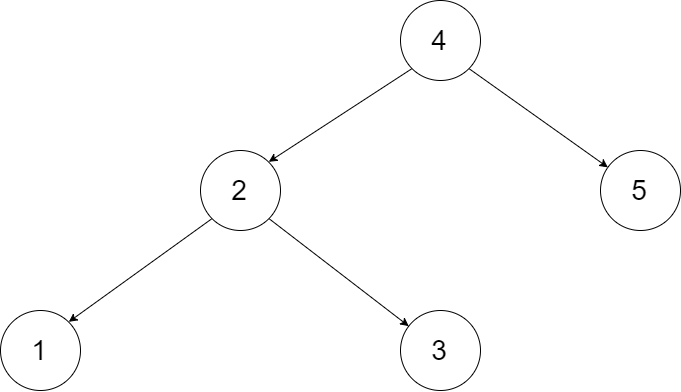

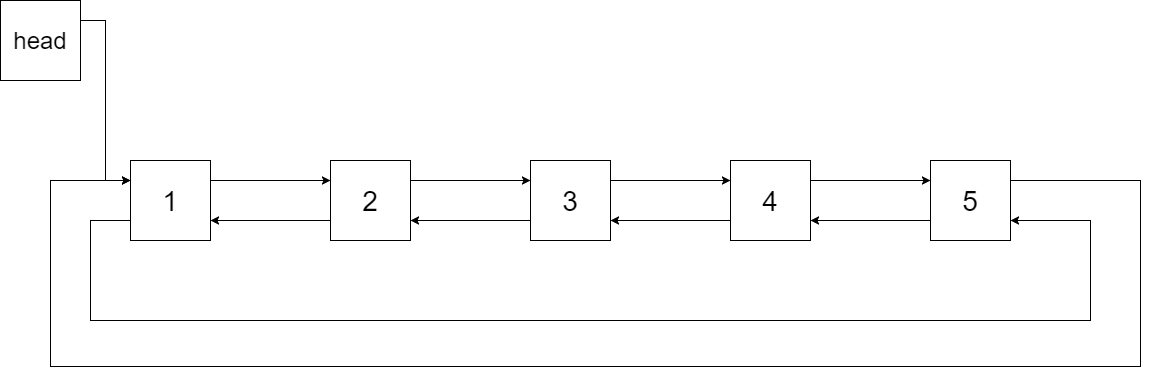

In [3]:
from IPython.display import display,Image
image1=Image(filename='剑指 Offer 36. 二叉搜索树与双向链表搜索树.png')
image2=Image(filename='剑指 Offer 36. 二叉搜索树与双向链表链表.png')
display(image1,image2)

In [ ]:
#输入层序遍历的二叉搜索树！！！看清楚
#输出左根右，中序遍历
#排序链表： 节点应从小到大排序，因此应使用 中序遍历 “从小到大”访问树的节点；
#双向链表： 在构建相邻节点（设前驱节点 pre ，当前节点 cur）关系时，不仅应 pre.right = cur ，也应 cur.left = pre 。
#2.right=3, 3.left=2
#循环链表： 设链表头节点 head 和尾节点 tail ，则应构建 head.left = tail 和 tail.right = head 。
#5.right=1, 1.left=5
#中序遍历完成后，最后构建头节点和尾节点的引用指向即可。

# Definition for a Node.
# class Node(object):
#     def __init__(self, val, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

class Solution(object):
    def treeToDoublyList(self, root):
        def dfs(cur):
            if not cur: 
                return
            dfs(cur.left) # 递归左子树
            if self.pre: #除了第一个进来的一开始的节点都右pre
                self.pre.right, cur.left = cur, self.pre#互为左右
            else: #只有进来的第一个节点没有pre，代表正在访问链表头节点
                self.head = cur
            self.pre = cur#这样pre就会推到链表的下一个节点，即节点 cur是后继节点的 pre
            #对于第一个节点没有pre，head，cur，pre都是它自己
            dfs(cur.right) # 递归右子树
        
        if not root: 
            return
        self.pre = None
        dfs(root)
        self.head.left, self.pre.right = self.pre, self.head#连接头尾，循环链表
        return self.head#返回头节点即可获得整个链表
